In [1]:
import numpy as np

In [2]:
Y_train = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/train/Y_train.txt')

In [3]:
Y_train.shape

(7352,)

In [4]:
accX = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt')

In [5]:
accY = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt')

In [6]:
accZ = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt')

In [7]:
x = '''
final float alpha = 0.8;

          gravity[0] = alpha * gravity[0] + (1 - alpha) * event.values[0];
          gravity[1] = alpha * gravity[1] + (1 - alpha) * event.values[1];
          gravity[2] = alpha * gravity[2] + (1 - alpha) * event.values[2];

'''

In [8]:
linearX = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt')
linearY = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/body_acc_y_train.txt')
linearZ = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt')

In [9]:
gravityX = accX - linearX
gravityY = accY - linearY
gravityZ = accZ - linearZ

In [10]:
activty_labels  = '''
1 WALKING
2 WALKING_UPSTAIRS
3 WALKING_DOWNSTAIRS
4 SITTING
5 STANDING
6 LAYING

'''

In [12]:

standing_index = np.argwhere(Y_train == 5)
laying_index = np.argwhere(Y_train == 6)


In [13]:
standing_index.shape

(1374, 1)

In [14]:
laying_index.shape

(1407, 1)

In [15]:
s_l_i = np.vstack((standing_index, laying_index))[:,0]

In [16]:
accX = accX[s_l_i,:]
accY = accY[s_l_i,:]

In [17]:
accZ = accZ[s_l_i, :]

In [18]:
linearX = linearX[s_l_i, :]
linearY = linearY[s_l_i, :]
linearZ = linearZ[s_l_i, :]

In [19]:
gravityX = gravityX[s_l_i, :]
gravityZ = gravityZ[s_l_i, :]
gravityY = gravityY[s_l_i, :]

In [20]:
num_features = 3
features_data = np.zeros(shape=(linearY.shape[0],3))

In [21]:
Y_train_s_l = Y_train[s_l_i]

In [22]:
for i in range(gravityX.shape[0]):
    m_gx = np.mean(gravityX[i,:])
    m_gy = np.mean(gravityY[i,:])
    m_gz = np.mean(gravityZ[i,:])
    features_data[i,:] = [m_gx,m_gy,m_gz]

In [23]:
import seaborn as sns

In [24]:
features_data.shape

(2781, 3)

In [25]:
import pandas as pd
features_df = pd.DataFrame(features_data)
features_df.columns = ["mean_gravityX", "mean_gravityY", "mean_gravityZ"]

In [26]:
labels_df = pd.DataFrame(Y_train_s_l)
labels_df.columns = ["label"]
labels_df.head()

,label
0,5.0
1,5.0
2,5.0
3,5.0
4,5.0


In [27]:
features_df.head()

,mean_gravityX,mean_gravityY,mean_gravityZ
0,1.017036,-0.122607,0.107857
1,1.019274,-0.123317,0.101965
2,1.019498,-0.123775,0.094599
3,1.020020,-0.125739,0.092601
4,1.020451,-0.130507,0.087329


In [28]:
f_features_df = features_df.join(labels_df)

In [29]:
import matplotlib.pyplot as plt
import time

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

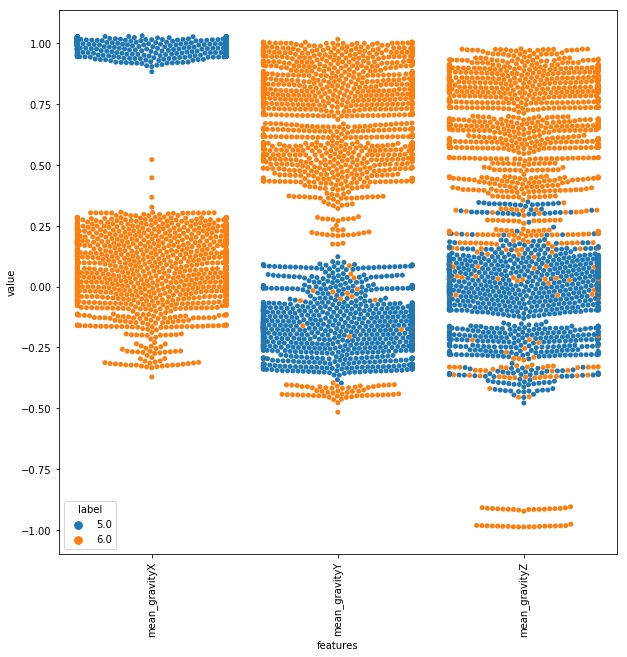

In [101]:
test = pd.melt(f_features_df,id_vars="label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="label", data=test)
plt.xticks(rotation=90)

In [30]:
from sklearn.svm import SVC

In [31]:
from sklearn.svm import LinearSVC

In [32]:
model = LinearSVC(C=1.0, loss='hinge')
from sklearn.model_selection import cross_val_score
cross_val_score(model, features_data, Y_train_s_l)

array([ 1.,  1.,  1.])

In [33]:
model = LinearSVC(C=1.0, loss='hinge')
model.fit(features_data, Y_train_s_l)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

<h2> Evaluating on test Data </h2>

In [34]:
accX = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt')
accY = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt')
accZ = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/total_acc_z_test.txt')

In [35]:
linearX = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt')
linearY = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/body_acc_y_test.txt')
linearZ = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/body_acc_z_test.txt')

gravityX = accX - linearX
gravityY = accY - linearY
gravityZ = accZ - linearZ

In [36]:
Y_test = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/test/Y_test.txt')

In [37]:
standing_index = np.argwhere(Y_test == 5)
laying_index = np.argwhere(Y_test == 6)


In [38]:
s_l_i = np.vstack((standing_index, laying_index))[:,0]

In [39]:
accX = accX[s_l_i,:]
accY = accY[s_l_i,:]

In [40]:
accZ = accZ[s_l_i, :]

In [41]:
linearX = linearX[s_l_i, :]
linearY = linearY[s_l_i, :]
linearZ = linearZ[s_l_i, :]

In [42]:
gravityX = gravityX[s_l_i, :]
gravityZ = gravityZ[s_l_i, :]
gravityY = gravityY[s_l_i, :]

In [43]:
num_features = 3
features_data = np.zeros(shape=(linearY.shape[0],3))
Y_test_s_l = Y_test[s_l_i]

In [44]:
for i in range(gravityX.shape[0]):
    m_gx = np.mean(gravityX[i,:])
    m_gy = np.mean(gravityY[i,:])
    m_gz = np.mean(gravityZ[i,:])
    features_data[i,:] = [m_gx,m_gy,m_gz]

In [45]:
y_predict = model.predict(features_data)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test_s_l, y_predict)

1.0

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

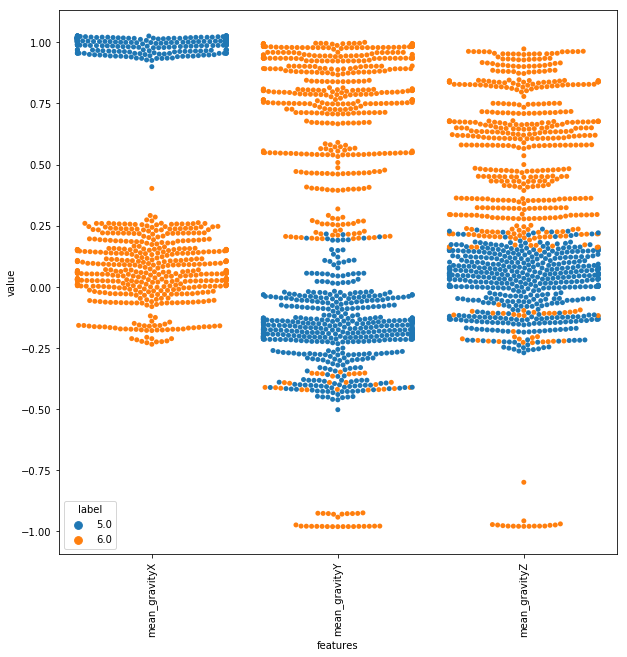

In [47]:
import pandas as pd
features_df = pd.DataFrame(features_data)
features_df.columns = ["mean_gravityX", "mean_gravityY", "mean_gravityZ"]
labels_df = pd.DataFrame(Y_test_s_l)
labels_df.columns = ["label"]
f_features_df = features_df.join(labels_df)
test = pd.melt(f_features_df,id_vars="label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="label", data=test)
plt.xticks(rotation=90)